<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Banton\AppData\Local\Temp\ipykernel_16220\2410508006.py:47: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Gaußkurvenfit an das korrigierte Cs-Streuspektrum bei '+str(winkel)+'$^{\circ}$',fontsize=15)
C:\Users\Banton\AppData\Local\Temp\ipykernel_16220\2410508006.py:287: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


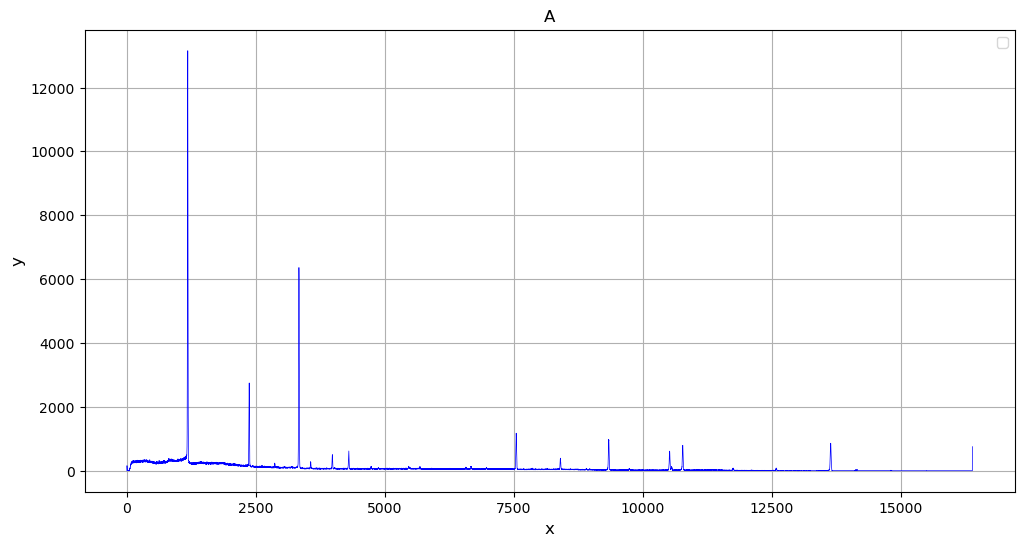

In [2]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
import uncertainties
from scipy import optimize
from scipy.optimize import curve_fit
from uncertainties import ufloat as uf
from uncertainties.umath import *
from uncertainties import unumpy as un
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel

def E_kal(kanal,m,b):
    return m*kanal+b

# def Effizienz(E,A,B,C,D):
#     return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E

# def uEffizienz(E,A,B,C,D):
#     # return (P1+P2*np.log(E)+P4*np.log(E)**3+P5*np.log(E)**4    +P3*np.log(E)**2)/E
#     return A-B*exp(C*(E+D))
def Gausfit_1(winkel,x,y,namena,amplitude,center,sigma,dont_show):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    # print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    figure=plt.figure(figsize=(10,6))
    plt.title('Gaußkurvenfit an das korrigierte Cs-Streuspektrum bei '+str(winkel)+'$^{\circ}$',fontsize=15)
    plt.plot(x1,y1,"b-",linewidth=.2,label="Messwerte",)
    plt.plot(x1,result.best_fit,"r-",label="Gaußkurve",)
    plt.xlabel('Energie [keV]',fontsize=12)
    plt.ylabel('Zählrate',fontsize=12)
    plt.grid()
    plt.legend(fontsize=12)
    plt.savefig(namena+'.png')
    if (dont_show==1):
        plt.close(figure)
    #plt.show
    return lolo1,lala1

def Gausfit_11(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    #print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gausfit_2(x,y,amplitude,center,sigma):
    x1 = x
    y1 = y
    model = (GaussianModel(prefix='g1_') +
             GaussianModel(prefix='g2_'))
    params = model.make_params(g1_amplitude=amplitude,
                            g1_center=center,
                            g1_sigma=sigma,
                            g2_amplitude=amplitude,
                            g2_center=center,
                            g2_sigma=sigma)
    result = model.fit(y1, params, x=x1)
    print(result.fit_report(min_correl=0.5))
    lolo1=[]
    lala1=[]
    for name,param in result.params.items():
        if result.errorbars==True:
            lala1.append(param.stderr)
        else:
            lala1.append(0)
        lolo1.append(param.value)
    comps = result.eval_components(x=x1)
    dely = result.eval_uncertainty(sigma=3)
    ergebnis = model.eval(params,x=x1)
    return lolo1,lala1,result.best_fit

def Gradenfit(x,y):
    anpassungs_werte, co_var = curve_fit(E_kal,x,y)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(E_kal(E, *anpassungs_werte))
    return Rfit

def Fit(x,y,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit2(x,y,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth(x,y,x_smooth,s,funktion,d_y):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,sigma=d_y,absolute_sigma=True,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit

def Fit_smooth2(x,y,x_smooth,s,funktion):
    anpassungs_werte, co_var = curve_fit(funktion,x,y,p0=s)
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for E in x_smooth:
        Rfit.append(funktion(E, *anpassungs_werte))
    return Rfit
#Die beiden Funktionen sind leichte Abänderungen von Teilen eines Skriptes zur Auswertung von Radioteleskop-Spektren, das uns im Rahmen 
#eines Praktikum 4 Versuches gegeben wurde
def getSignal(x,y,width_guess,NPeaks,smoothing,signal_range,signal_thr = None):
    s_mask = (x>signal_range[0])&(x<signal_range[1])
    x_s = x[s_mask]
    signal_use = (y)[s_mask]

    if (smoothing == 1):
        b,a = scs.butter(3,0.07)
        zi = scs.lfilter_zi(b, a)
        z, _ = scs.lfilter(b, a, x_s, zi=zi*signal_use[0])
        z2, _ = scs.lfilter(b, a, z, zi=zi*z[0])
        signal_smooth = scs.filtfilt(b, a, signal_use)
    
    else:
       signal_smooth = signal_use

    amp = (np.max(signal_smooth)-np.min(signal_smooth))
    minimum = np.min(signal_smooth)
    
    s_min = signal_range[0]+50
    s_max = signal_range[1]-50
    
    s_mask_narrow = ((x_s>s_min)&(x_s<s_max))
    
    if signal_thr is None:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], width=width_guess)
        prom = peaks[1]['prominences']
    else:
        peaks = scs.find_peaks(signal_smooth[s_mask_narrow], height = minimum + signal_thr*amp, width=width_guess)
        prom = peaks[1]['peak_heights']
    prom_save = prom.copy()
    prom.sort()
    
    # only use the most prominent peaks for our first guess of the Gauss peak centers:
    if NPeaks > len(prom): # if not enough peaks are found, reduce NPeaks!
        NPeaks = len(prom)
        print("reduced NPeaks to "+str(NPeaks))
    peaks_use = peaks[0][prom_save>=prom[-NPeaks]] 
    peak_width = peaks[1]['widths'][prom_save>=prom[-NPeaks]]
    # save the peak positions for later
    gauss_centers = x_s[s_mask_narrow][peaks_use]
    peak_y = signal_use[s_mask_narrow][peaks_use]
    return x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth

def detailedSignalFit(x_s, signal_use,add_gaussians, gauss_centers, peak_width, center_variation,sigma_min,sigma_max,amp_min,amp_value_guess,poly_deg = 3):
    mask_edges = np.logical_or(x_s<signal_range[0]+50, x_s>signal_range[1]-50)
    if not (poly_deg is None):
        poly1 = PolynomialModel(degree=poly_deg, prefix='p1_')
        p_s = poly1.guess(signal_use[mask_edges],x=x_s[mask_edges])

    # set up the first Gauss peak
    gaussX = GaussianModel(prefix='g'+str(0)+'_')
    gaussians = gaussX
    p_gauss = gaussX.make_params()
    if (poly_deg is None): p_s = p_gauss 
    p_gauss['g'+str(0)+'_center'].set(value=gauss_centers[0], min=gauss_centers[0]-center_variation, max=gauss_centers[0]+center_variation) # center
    p_gauss['g'+str(0)+'_sigma'].set(value=peak_width[0], min=sigma_min, max=sigma_max) # width of peak
    p_gauss['g'+str(0)+'_amplitude'].set(value=amp_value_guess, min=amp_min) # amplitude of peak

    # now set up the rest of the Gauss peaks:
    for i in np.arange(1,len(gauss_centers)):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params())
        p_gauss['g'+str(i)+'_center'].set(value=gauss_centers[i], min=gauss_centers[i]-center_variation, max=gauss_centers[i]+center_variation)
        p_gauss['g'+str(i)+'_sigma'].set(value=peak_width[i], min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(value=amp_value_guess, min=amp_min)
    
    # add some extra gauss peaks with free parameters to patch up anything left
    for i in np.arange(len(gauss_centers),len(gauss_centers)+add_gaussians):
        gaussX = GaussianModel(prefix='g'+str(i)+'_')
        gaussians = gaussians + gaussX
        p_gauss.update(gaussX.make_params()) 
        p_gauss['g'+str(i)+'_center'].set(min=np.min(x_s)+50, max=np.max(x_s)-50)
        p_gauss['g'+str(i)+'_sigma'].set(min=sigma_min, max=sigma_max)
        p_gauss['g'+str(i)+'_amplitude'].set(min=amp_min)
    
    # assemble the model:  polynomial background + Gauss peaks
    if not (poly_deg is None): mod_s = poly1 + gaussians
    else: mod_s = gaussians
    # include parameters for the Gauss peaks in the parameter list
    p_s.update(p_gauss)
    # initialize model with the parameters
    init_s = mod_s.eval(p_s, x=x_s)
    # fit model
    out_s = mod_s.fit(signal_use, p_s, x=x_s)
    return p_s, out_s, mod_s, gaussians

def Fit_allinone(x,y,width,N,center_var,s_range,amp_guess,polydeg=None,ampmin=0,sigmamin=0,sigmamax=500,more_gaus=0,smoothe= 1):
    x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,width,N, smoothe,s_range,signal_thr= None)
    p_s, out_s, mod_s, mod_s_only = detailedSignalFit(x_s, signal_use,more_gaus, gauss_centers, peak_width,center_var,sigma_min=sigmamin,sigma_max=sigmamax,amp_min=ampmin,amp_value_guess=amp_guess,poly_deg= polydeg)
    lolo1=[]
    lala1=[]
    names=[]
    i=0
    if not (polydeg is None):
        n=polydeg
    else:
        n=-1
    for name,param in out_s.params.items():
        if i>n:
            if out_s.errorbars==True:
                lala1.append(param.stderr)
            else:
                lala1.append(0)
            names.append(name)
            lolo1.append(param.value)
        i=i+1
    result=out_s.best_fit
    return p_s,x_s,result,lolo1,lala1,out_s,mod_s,mod_s_only,names,gauss_centers,peak_y

def Plotter(X,Y,N_plots,figsiz=(12,6),labels=[],colors=[],linewidths=[],styles=[],markersizes=[],xtitle='x',ytitle='y',title='A',name=None,xrange=None,yrange=None):
    for n in range(0,N_plots):
        labels.append('')
        colors.append('b')
        linewidths.append(0.5)
        styles.append('-')
        markersizes.append(1)
    figure=plt.figure(figsize=figsiz)
    plt.title(title)
    for i in range(0,N_plots):
        plt.plot(X[i],Y[i],styles[i],color=colors[i],linewidth=linewidths[i],label=labels[i],markersize=markersizes[i])
    plt.xlabel(xtitle,fontsize=12)
    plt.ylabel(ytitle,fontsize=12)
    if not (xrange is None):
        plt.xlim(xrange)
    if not (yrange is None):
        plt.ylim(yrange)
    plt.grid()
    plt.legend()
    if not (name is None):
        plt.savefig(name+'.png')
    plt.show
    return 0

def filetoxy(name):
    data=np.loadtxt(name)
    x=data[:,0]
    y=data[:,1]
    return x,y
signal_range=[0,4500]
path1='../data/'
xEu,yEu=filetoxy(path1+'Eu-Ge-10.txt')
xCo,yCo=filetoxy(path1+'Co-Ge.txt')
xCs,yCs=filetoxy(path1+'Cs-Ge.txt')
xBg,yBg=filetoxy(path1+'Hintergrund-Ge.txt')

# datas=glob.glob(path1+'*Ge*txt')
# data_Ge=[]
# x=[]
# y=[]
# for data in datas:
#     data_Ge.append(np.loadtxt(data))
#     x.append(data_Ge[len(x)][:,0])
#     y.append(data_Ge[len(y)][:,1])

Plotter([xEu],[yEu],1)
# print(datas)
# data1=np.loadtxt(path1+'spectrum.txt')

#p_s,x_s,Rfit,params,params_stderr,result,model,model_gaus,names,gc,py=Fit_allinone(x,y,width=20,N=4,center_var=50,s_range=signal_range,amp_guess=5000,polydeg=3,more_gaus=1)


# data_x=[x,x_s,gc]
# data_y=[y,Rfit,py]
# Plotter(x,y,3,['spektrum','fit',''],['blue','red','lightgreen'],[1,2,10],['-','-','x'],[0,0,10],'kanal','Anzahl','Voraufgabe','voraufgabe')
# Namen=['Amplitude','center','sigma','fwhm','heigth']
# with open('Tab1'+'.txt', 'w') as f:
#     for h in range(0,len(Namen)):
#         f.write(Namen[h]+ '\t')
#     f.write('\n')
#     count=0
#     for i in range(0,len(params)):
#         f.write(str(np.round(params[i],3))+ '\t')
#         if (count==(len(Namen)-1)):
#             f.write('\n')
#             count=-1
#         count=count+1
#     f.close

def coarseBackgroundModel(x,y,deg):
    """
    coarse fit of a polynomial model to the entire data for a first background reduction:

    x: v_LSR
    y: T_A
    deg: degree of the polynom to fit to the data

    """
    # set up polynomial model
    poly_mod = PolynomialModel(deg, prefix='p1_')

    # mask= ((x<signal_range[0]) | (x>signal_range[1]))
    x_ = x
    y_ = y

    # let lmfit guess the parameter values:
    p_bg = poly_mod.guess(y_, x=x_)

    # set up our background model (only polynomial here):
    mod_bg = poly_mod

    # initialize the model with the guessed parameters:
    init_bg = mod_bg.eval(p_bg, x=x_)

    # fit the model:
    out_bg = mod_bg.fit(y_, p_bg, x=x_)

    # return results:
    return p_bg, out_bg, mod_bg

def BackgroundVernichter(x_wpeaks,x_wopeaks,y_wopeaks,N_Bgsplit,Bgoverlap):
    x=x_wpeaks
    x2=x_wopeaks
    y2=y_wopeaks
    BG=[]
    BG2=[]
    for i in range(N_Bgsplit):
        mask=((x2>=len(x)*(i/N_Bgsplit-1/(N_Bgsplit*Bgoverlap))) & (x2<len(x)*((i+1)/N_Bgsplit+1/(N_Bgsplit*Bgoverlap))))
        mask2=((x>=len(x)*i/N_Bgsplit) & (x<len(x)*(i+1)/N_Bgsplit))
        mask3=((x2>=len(x)*i/N_Bgsplit) & (x2<len(x)*(i+1)/N_Bgsplit))
        p_bg, out_bg, mod_bg = coarseBackgroundModel(x2[mask],y2[mask],7)  
        background = mod_bg.eval(p_bg,x=x[mask2])
        BG=np.concatenate((BG,background))
        background = mod_bg.eval(p_bg,x=x2[mask3])
        BG2=np.concatenate((BG2,background))
    return BG,BG2

In [86]:
x=xEu
y=(yEu-yBg)/600
x_s, signal_use, gauss_centers, peak_y, peak_width, signal_smooth = getSignal(x,y,1,1, 0,[14200,15000],signal_thr= None)
py=[0.01*x for x in range(29)]
ranges=[1179.0, 1438.0, 2369.0, 2862.0, 3333.0, 3559.0, 3982.0, 4300.0, 4733.0, 5462.0, 5676.0, 6568.0, 6665.0, 6964.0, 7543.0, 7853.0, 8402.0, 8905.0, 8910.0, 9335.0, 9736.0, 10515.0, 10555.0, 10770.0, 11745.0, 12579.0, 13638.0, 14116.0, 14805.0]
yranges=[21.891666666666666, 0.4716666666666667, 4.575, 0.3933333333333333, 10.598333333333333, 0.46166666666666667, 0.835, 1.03, 0.23, 0.23333333333333334, 0.215, 0.18833333333333332, 0.22666666666666666, 0.155, 1.9583333333333333, 0.13666666666666666, 0.6533333333333333, 0.10833333333333334, 0.10833333333333334, 1.6366666666666667, 0.11333333333333333, 1.0233333333333334, 0.22166666666666668, 1.3266666666666667, 0.13666666666666666, 0.13833333333333334, 1.4333333333333333, 0.04666666666666667, 0.02666666666666667]
widths=[10.923773223379612, 15.545385202135776, 12.127571091379195, 13.879032258064626, 12.678768887208207, 12.601785714285597, 13.344343891402787, 13.397280233122729, 15.148809523809177, 18.134502923976584, 11.833333333333371, 13.0, 17.871428571428623, 16.541666666666742, 15.164104638618937, 11.384615384615245, 14.721568627451234, 12.345238095238074, 12.345238095238074, 16.933486622073588, 17.0, 17.333333333333258, 9.861904761904725, 16.94063706563702, 18.57983193277309, 15.0, 19.067307692307622, 5.791666666666515, 4.272727272727252]
#Plotter([x,ranges],[y,yranges],2,colors=['b','r'],styles=['-','x'],markersizes=[0,5],linewidths=[0.5,5],yrange=(0,1))
# for g in peak_y:
#     yranges.append(g)
# for g in peak_width:
#     widths.append(g)
# print(yranges)
# print(widths)
print(len(yranges))


29


Durch die Anpassung bestimmte Parameter: [-2.39132364e-03  3.81105760e+06  2.18509933e+00] +/- [2.44363139e-05 4.29849254e+05 1.59655635e-01] nm
Durch die Anpassung bestimmte Parameter: [-3.26316465e-04  1.06593100e+02 -2.52184233e-01] +/- [3.39082797e-05 2.95312545e+01 2.48002917e-01] nm


C:\Users\Banton\AppData\Local\Temp\ipykernel_16220\2410508006.py:287: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


0

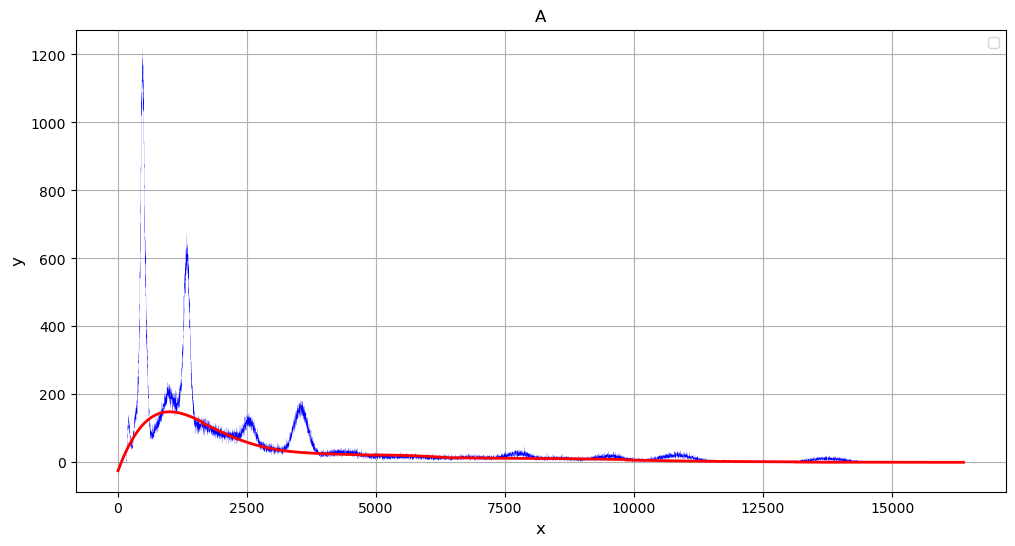

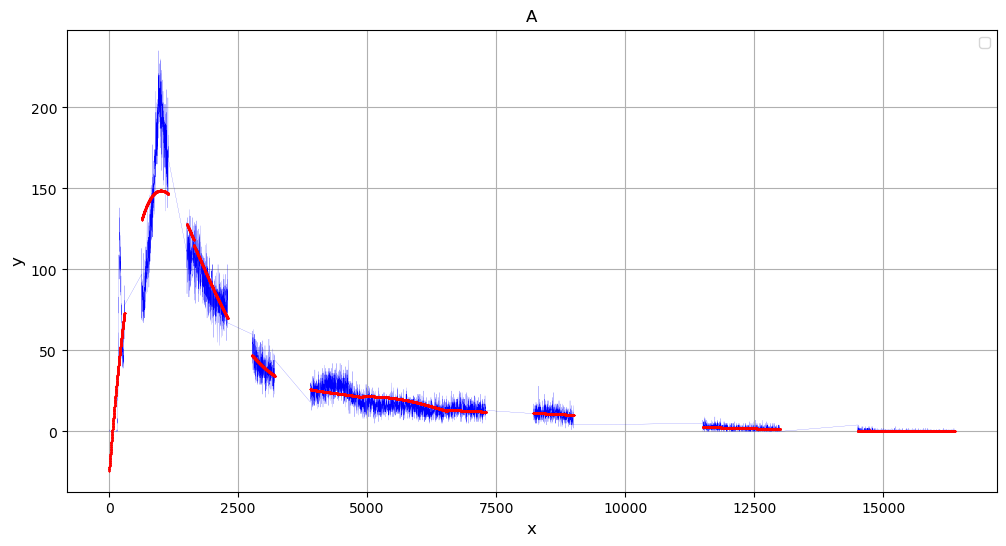

In [11]:
xCoGe,yCoGe=filetoxy(path1+'Co-Ge.txt')
xCoNa,yCoNa=filetoxy(path1+'Co-Na.txt')
xCsGe,yCsGe=filetoxy(path1+'Cs-Ge.txt')
xCsNa,yCsNa=filetoxy(path1+'Cs-Na.txt')
xEuGe,yEuGe=filetoxy(path1+'Eu-Ge-10.txt')
xEuNa,yEuNa=filetoxy(path1+'Eu-Na.txt')
yCoGe[16383]=0
yCoNa[16383]=0
yCsGe[16383]=0
yCsNa[16383]=0
yEuGe[16383]=0
yEuNa[16383]=0
i=0
while i<10:
    yCoGe[i]=0
    yCoNa[i]=0
    yCsGe[i]=0
    yCsNa[i]=0
    yEuGe[i]=0
    yEuNa[i]=0
    i=i+1

def exp(x,a,b,c):
    y=b*np.exp(a*x)+c
    return y


mask= (((xCsNa>4500) & (xCsNa<5900)) | ((xCsNa>7300) & (xCsNa<8000)))
x_ = xCsNa[mask]
y_ = yCsNa[mask]

x_smooth=np.linspace(4500,8000,num=150)
p_bg= Fit_smooth2(x_,y_,x_smooth,[0,0,0],exp)  

#Plotter([xCsNa,x_smooth],[yCsNa,p_bg],2,colors=['b','r'],linewidths=[.1,2])


mask= (((xCoNa>9000) & (xCoNa<11000)) | ((xCoNa>13600) & (xCoNa<14500)))
x_ = xCoNa[mask]
y_ = yCoNa[mask]

x_smooth=np.linspace(9000,16000,num=550)
p_bg= Fit_smooth2(x_,y_,x_smooth,[0,0,0],exp)  

#Plotter([xCoNa,x_smooth],[yCoNa,p_bg],2,colors=['b','r'],linewidths=[.1,2])


mask= (((xEuNa>0) & (xEuNa<300)) | ((xEuNa>630) & (xEuNa<1150)) | ((xEuNa>1500) & (xEuNa<2300)) | ((xEuNa>2770) & (xEuNa<3210)) | ((xEuNa>3900) & (xEuNa<7300)) | ((xEuNa>8220) & (xEuNa<9000)) | ((xEuNa>11500) & (xEuNa<13000)) | ((xEuNa>14500) & (xEuNa<16383)))########################################################
x_ = xEuNa[mask]
y_ = yEuNa[mask]

background1,background2=BackgroundVernichter(xEuNa,x_,y_,10,0.3)

Plotter([xEuNa,xEuNa],[yEuNa,background1],2,colors=['b','r'],linewidths=[.1,2])
Plotter([x_,x_],[y_,background2],2,styles=['-','x'],colors=['b','r'],linewidths=[.1,2])

